In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("datasets/dataset_train.csv")
data['Birthday'] = pd.to_datetime(data['Birthday'])
data['Birthday Weekday'] = data['Birthday'].dt.dayofweek
data['Birthday Year'] = data['Birthday'].dt.year
data['Birthday Month'] = data['Birthday'].dt.month
data = data.drop(columns=['Index', 'First Name', 'Last Name', 'Birthday', 'Defense Against the Dark Arts', 'Arithmancy', 'Care of Magical Creatures'])
data

,Hogwarts House,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Weekday,Birthday Year,Birthday Month
0,Ravenclaw,Left,-487.886086,5.727180,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,-232.79405,-26.89,3,2000,3
1,Slytherin,Right,-552.060507,-5.987446,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,-252.18425,-113.45,3,1999,10
2,Ravenclaw,Left,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42,2,1999,11
3,Gryffindor,Left,697.742809,-6.497214,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-256.84675,200.64,5,2000,8
4,Gryffindor,Left,436.775204,-7.820623,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-256.38730,157.98,6,1998,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,Right,354.280086,-4.541837,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-250.39401,185.83,4,2001,9
1596,Slytherin,Left,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-246.42719,44.80,3,1998,3
1597,Gryffindor,Right,544.018925,-3.203269,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,-251.63679,198.47,6,1999,10
1598,Hufflepuff,Left,453.676219,3.442831,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-246.19072,-76.81,4,2001,9


<Axes: xlabel='Hogwarts House', ylabel='Birthday Weekday'>

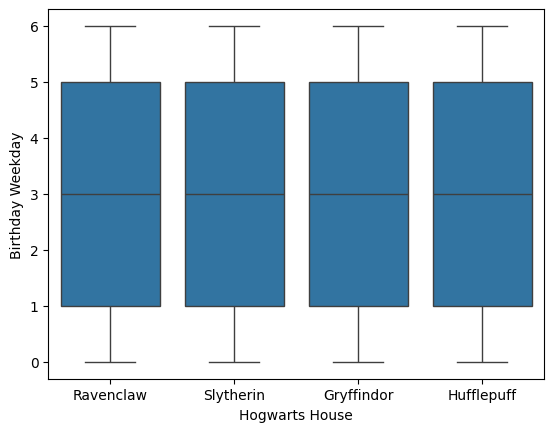

In [3]:
sns.boxplot(data=data, x='Hogwarts House', y='Birthday Weekday')

<Axes: xlabel='Hogwarts House', ylabel='Birthday Month'>

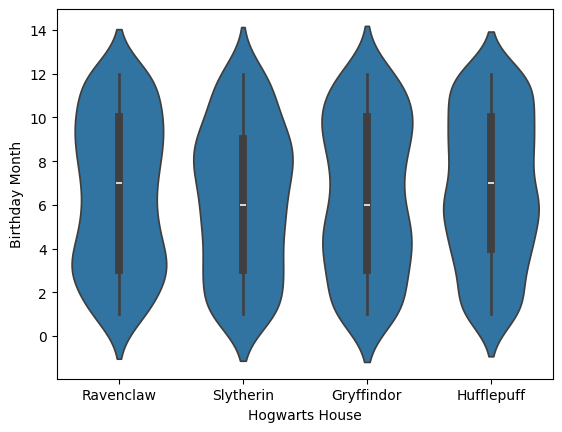

In [4]:
sns.violinplot(data=data, x='Hogwarts House', y='Birthday Month')

<Axes: xlabel='Hogwarts House', ylabel='Birthday Year'>

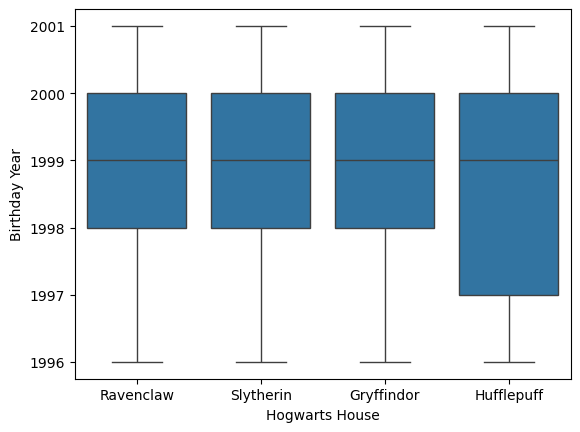

In [5]:
sns.boxplot(data=data, x='Hogwarts House', y='Birthday Year')

In [6]:
def ft_train_test_split(data, test_size=0.25, stratify_col=None, random_state=None):
    if not stratify_col:
        data_train = data.sample(frac=1-test_size, random_state=random_state)
    else:
        groups = data.groupby(stratify_col).groups
        data_train = pd.DataFrame()
        for group in groups.values():
            group_sample = data.iloc[group].sample(frac=1-test_size, random_state=random_state)
            data_train = pd.concat([data_train, group_sample])
    data_test = data.iloc[data.index.difference(data_train.index)]
    return (data_train, data_test)

In [7]:
data_train, data_test = ft_train_test_split(data, stratify_col='Hogwarts House')
display(data_train)
display(data_test)

,Hogwarts House,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Weekday,Birthday Year,Birthday Month
615,Gryffindor,Right,604.751042,-4.761269,4.824,-330.079791,616.044385,-4.945047,942.209764,2.254483,-253.85094,186.85,2,1997,4
879,Gryffindor,Left,569.436312,-5.153783,6.479,-350.956255,573.910363,-4.013581,948.759374,2.744015,-250.98901,183.22,4,2000,5
399,Gryffindor,Right,634.501500,-6.855740,3.211,-108.574695,617.553811,-1.740121,955.817691,5.799412,-255.11472,121.40,1,2000,1
885,Gryffindor,Right,731.238654,-4.549645,2.776,-851.417369,627.391767,-6.908759,910.392757,1.463259,-259.51864,256.57,4,1997,1
671,Gryffindor,Right,723.738847,-3.273226,4.066,-832.329044,641.575899,-6.005476,954.515657,5.712511,-255.12801,254.99,1,1997,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Slytherin,Left,-471.222323,-2.230513,-4.405,-460.407658,445.534911,3.974861,1023.494693,7.993615,-248.13382,-5.42,2,1999,1
905,Slytherin,Right,-435.767482,-6.990929,-6.371,-583.297628,366.870052,4.655959,1066.951960,8.895538,-254.72690,-128.72,5,1998,10
1424,Slytherin,Left,-486.774286,-5.894275,-6.540,-424.816974,391.075997,6.358912,1031.537229,8.964686,-252.34178,-94.83,5,2001,6
1220,Slytherin,Left,-354.496856,-3.928853,-6.172,-390.222174,418.464607,2.456552,1041.486530,7.144740,-253.03832,-42.87,4,1999,8


,Hogwarts House,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Weekday,Birthday Year,Birthday Month
2,Ravenclaw,Left,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42,2,1999,11
7,Hufflepuff,Right,411.412727,5.931832,2.769,-502.021336,439.351416,NaN,1041.091935,6.581791,-244.03492,72.25,1,1997,7
10,Hufflepuff,Right,604.933962,5.484189,5.358,-530.795896,484.872671,5.699654,1036.285357,9.293132,-242.69168,64.61,3,1998,5
12,Hufflepuff,Right,709.094614,1.705389,7.091,-328.712955,435.502183,6.300649,1037.028317,8.110274,-244.00363,7.56,0,2000,3
13,Slytherin,Left,-544.192049,-7.308856,-6.180,-319.946875,391.652916,2.914732,1082.581409,10.948791,-251.12516,-80.42,3,1997,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,Slytherin,Left,-485.249736,-8.390447,-6.040,-522.882041,370.798886,6.622655,1066.781683,11.485894,-253.02158,-138.01,3,1999,1
1588,Slytherin,Right,-492.510311,-2.208650,-7.270,-622.936567,NaN,2.201186,1069.012391,9.117247,-250.91192,-19.50,4,1999,4
1593,Ravenclaw,Left,-426.175401,5.681107,6.205,473.879478,647.238809,6.254227,1046.815627,7.206156,-230.80139,-29.82,3,1998,1
1596,Slytherin,Left,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-246.42719,44.80,3,1998,3


In [8]:
X_train = data_train.drop(columns=['Hogwarts House', 'Birthday Weekday'])
data_train['House Slytherin'] = (data_train['Hogwarts House'] == 'Slytherin').astype(int)
data_train['House Hufflepuff'] = (data_train['Hogwarts House'] == 'Hufflepuff').astype(int)
data_train['House Gryffindor'] = (data_train['Hogwarts House'] == 'Gryffindor').astype(int)
data_train['House Ravenclaw'] = (data_train['Hogwarts House'] == 'Ravenclaw').astype(int)
Y_train = data_train[[col for col in data_train.columns if col.startswith('House ')]]
display(X_train)
display(Y_train)

,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Year,Birthday Month
615,Right,604.751042,-4.761269,4.824,-330.079791,616.044385,-4.945047,942.209764,2.254483,-253.85094,186.85,1997,4
879,Left,569.436312,-5.153783,6.479,-350.956255,573.910363,-4.013581,948.759374,2.744015,-250.98901,183.22,2000,5
399,Right,634.501500,-6.855740,3.211,-108.574695,617.553811,-1.740121,955.817691,5.799412,-255.11472,121.40,2000,1
885,Right,731.238654,-4.549645,2.776,-851.417369,627.391767,-6.908759,910.392757,1.463259,-259.51864,256.57,1997,1
671,Right,723.738847,-3.273226,4.066,-832.329044,641.575899,-6.005476,954.515657,5.712511,-255.12801,254.99,1997,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Left,-471.222323,-2.230513,-4.405,-460.407658,445.534911,3.974861,1023.494693,7.993615,-248.13382,-5.42,1999,1
905,Right,-435.767482,-6.990929,-6.371,-583.297628,366.870052,4.655959,1066.951960,8.895538,-254.72690,-128.72,1998,10
1424,Left,-486.774286,-5.894275,-6.540,-424.816974,391.075997,6.358912,1031.537229,8.964686,-252.34178,-94.83,2001,6
1220,Left,-354.496856,-3.928853,-6.172,-390.222174,418.464607,2.456552,1041.486530,7.144740,-253.03832,-42.87,1999,8


,House Slytherin,House Hufflepuff,House Gryffindor,House Ravenclaw
615,0,0,1,0
879,0,0,1,0
399,0,0,1,0
885,0,0,1,0
671,0,0,1,0
...,...,...,...,...
769,1,0,0,0
905,1,0,0,0
1424,1,0,0,0
1220,1,0,0,0


In [9]:
X_test = data_test.drop(columns=['Hogwarts House', 'Birthday Weekday'])
data_test['House Slytherin'] = (data_test['Hogwarts House'] == 'Slytherin').astype(int)
data_test['House Hufflepuff'] = (data_test['Hogwarts House'] == 'Hufflepuff').astype(int)
data_test['House Gryffindor'] = (data_test['Hogwarts House'] == 'Gryffindor').astype(int)
data_test['House Ravenclaw'] = (data_test['Hogwarts House'] == 'Ravenclaw').astype(int)
Y_test = data_test[[col for col in data_test.columns if col.startswith('House ')]]
display(X_test)
display(Y_test)

/tmp/ipykernel_498897/743598672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['House Slytherin'] = (data_test['Hogwarts House'] == 'Slytherin').astype(int)
/tmp/ipykernel_498897/743598672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['House Hufflepuff'] = (data_test['Hogwarts House'] == 'Hufflepuff').astype(int)
/tmp/ipykernel_498897/743598672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Year,Birthday Month
2,Left,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42,1999,11
7,Right,411.412727,5.931832,2.769,-502.021336,439.351416,NaN,1041.091935,6.581791,-244.03492,72.25,1997,7
10,Right,604.933962,5.484189,5.358,-530.795896,484.872671,5.699654,1036.285357,9.293132,-242.69168,64.61,1998,5
12,Right,709.094614,1.705389,7.091,-328.712955,435.502183,6.300649,1037.028317,8.110274,-244.00363,7.56,2000,3
13,Left,-544.192049,-7.308856,-6.180,-319.946875,391.652916,2.914732,1082.581409,10.948791,-251.12516,-80.42,1997,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,Left,-485.249736,-8.390447,-6.040,-522.882041,370.798886,6.622655,1066.781683,11.485894,-253.02158,-138.01,1999,1
1588,Right,-492.510311,-2.208650,-7.270,-622.936567,NaN,2.201186,1069.012391,9.117247,-250.91192,-19.50,1999,4
1593,Left,-426.175401,5.681107,6.205,473.879478,647.238809,6.254227,1046.815627,7.206156,-230.80139,-29.82,1998,1
1596,Left,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-246.42719,44.80,1998,3


,House Slytherin,House Hufflepuff,House Gryffindor,House Ravenclaw
2,0,0,0,1
7,0,1,0,0
10,0,1,0,0
12,0,1,0,0
13,1,0,0,0
...,...,...,...,...
1586,1,0,0,0
1588,1,0,0,0
1593,0,0,0,1
1596,1,0,0,0


# Missing values

In [10]:
X = pd.concat([X_train, X_test])
Y = pd.concat([Y_train, Y_test])

In [11]:
X.isna().sum() / len(X) * 100

Best Hand           0.0000
Astronomy           2.0000
Herbology           2.0625
Divination          2.4375
Muggle Studies      2.1875
Ancient Runes       2.1875
History of Magic    2.6875
Transfiguration     2.1250
Potions             1.8750
Charms              0.0000
Flying              0.0000
Birthday Year       0.0000
Birthday Month      0.0000
dtype: float64

In [12]:
Y.isna().sum() / len(Y) * 100

House Slytherin     0.0
House Hufflepuff    0.0
House Gryffindor    0.0
House Ravenclaw     0.0
dtype: float64

In [13]:
(Y['House Slytherin'] + Y['House Gryffindor'] + Y['House Ravenclaw'] + Y['House Hufflepuff']).value_counts()

1    1600
Name: count, dtype: int64

# Preprocessings

In [14]:
from logreg_train import SimpleImputer, StandardScaler, OneHotEncoder, PreprocessorPipeline
numerical_cols = ['Astronomy', 'Herbology', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Charms', 'Flying', 'Birthday Year']
categorical_cols = ['Birthday Month', 'Best Hand']
imputer = SimpleImputer(numerical_cols, categorical_cols)
scaler = StandardScaler(numerical_cols)
ohe = OneHotEncoder(categorical_cols)
preprocessor = PreprocessorPipeline([imputer, scaler, ohe])
preprocessor

--- SimpleImputer ---
Means: None
Modes: None

--- StandardScaler ---
Means: None
Standard Deviations: None

--- OneHotEncoder ---
Columns mapping: {}
Drop Last: True


In [15]:
preprocessor.fit(X_train)
preprocessor

--- SimpleImputer ---
Means: {'Astronomy': 39.34997975596599, 'Herbology': 1.1605148078279761, 'Divination': 3.1477945205479454, 'Muggle Studies': -228.74762639439086, 'Ancient Runes': 494.7172523712927, 'History of Magic': 2.962605968621041, 'Transfiguration': 1030.1523866396644, 'Potions': 5.906401534452153, 'Charms': -243.41227045833332, 'Flying': 21.22993333333334, 'Birthday Year': 1998.8108333333332}
Modes: {'Birthday Month': 3, 'Best Hand': 'Right'}

--- StandardScaler ---
Means: {'Astronomy': 39.34997975596599, 'Herbology': 1.1605148078279761, 'Divination': 3.1477945205479454, 'Muggle Studies': -228.74762639439086, 'Ancient Runes': 494.7172523712927, 'History of Magic': 2.962605968621041, 'Transfiguration': 1030.1523866396644, 'Potions': 5.906401534452153, 'Charms': -243.41227045833332, 'Flying': 21.22993333333334, 'Birthday Year': 1998.8108333333332}
Standard Deviations: {'Astronomy': 523.1821039768648, 'Herbology': 5.214328927011944, 'Divination': 4.149792873563048, 'Muggle St

In [16]:
X_train_preprocessed = preprocessor.transform(X_train)
X_train_preprocessed

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,...,Birthday Month_3,Birthday Month_4,Birthday Month_5,Birthday Month_6,Birthday Month_7,Birthday Month_8,Birthday Month_9,Birthday Month_10,Birthday Month_11,Best Hand_Left
615,1.080696,-1.135675,0.403925,-0.207868,1.137279,-1.781188,-1.983918,-1.168733,-1.187843,1.679434,...,0,1,0,0,0,0,0,0,0,0
879,1.013197,-1.210951,0.802740,-0.250693,0.742329,-1.571376,-1.836164,-1.012067,-0.862176,1.642624,...,0,0,1,0,0,0,0,0,0,1
399,1.137561,-1.537351,0.015231,0.246518,1.151428,-1.059282,-1.676934,-0.034240,-1.331651,1.015752,...,0,0,0,0,0,0,0,0,0,0
885,1.322462,-1.095090,-0.089594,-1.277318,1.243646,-2.223511,-2.701685,-1.421950,-1.832785,2.386414,...,0,0,0,0,0,0,0,0,0,0
671,1.308127,-0.850299,0.221265,-1.238161,1.376603,-2.020048,-1.706306,-0.062051,-1.333164,2.370392,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,-0.975898,-0.650329,-1.820041,-0.475217,-0.461019,0.228009,-0.150192,0.667976,-0.537277,-0.270238,...,0,0,0,0,0,0,0,0,0,1
905,-0.908130,-1.563278,-2.293800,-0.727308,-1.198396,0.381425,0.830170,0.956621,-1.287520,-1.520534,...,0,0,0,0,0,0,0,1,0,0
1424,-1.005624,-1.352962,-2.334525,-0.402208,-0.971498,0.765013,0.031241,0.978750,-1.016112,-1.176880,...,0,0,0,1,0,0,0,0,0,1
1220,-0.752791,-0.976035,-2.245846,-0.331242,-0.714766,-0.113988,0.255690,0.396309,-1.095373,-0.649991,...,0,0,0,0,0,1,0,0,0,1


In [17]:
from logreg_train import SortingHat

sorting_hat = SortingHat(X_train_preprocessed.shape[1], lr=0.05)
sorting_hat

In [18]:
X_test_preprocessed = preprocessor.transform(X_test)
X_test_preprocessed

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,...,Birthday Month_3,Birthday Month_4,Birthday Month_5,Birthday Month_6,Birthday Month_7,Birthday Month_8,Birthday Month_9,Birthday Month_10,Birthday Month_11,Best Hand_Left
2,-0.774923,1.258935,0.721049,1.833177,1.011118,0.133566,1.306991,0.903173,1.828603,0.093190,...,0,0,0,0,0,0,0,0,1,1
7,0.711153,0.915039,-0.091280,-0.560582,-0.518980,0.000000,0.246788,0.216147,-0.070853,0.517358,...,0,0,0,0,1,0,0,0,0,0
10,1.081046,0.829191,0.532606,-0.619609,-0.092280,0.616516,0.138355,1.083864,0.081998,0.439886,...,0,0,1,0,0,0,0,0,0,0
12,1.280137,0.104496,0.950217,-0.205065,-0.555062,0.751889,0.155116,0.705311,-0.067292,-0.138617,...,1,0,0,0,0,0,0,0,0,0
13,-1.115371,-1.624249,-2.247774,-0.187082,-0.966090,-0.010784,1.182758,1.613729,-0.877669,-1.030759,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,-1.002710,-1.831676,-2.214037,-0.603375,-1.161569,0.824421,0.826329,1.785619,-1.093468,-1.614737,...,0,0,0,0,0,0,0,0,0,1
1588,-1.016587,-0.646136,-2.510437,-0.808622,0.000000,-0.171509,0.876652,1.027575,-0.853404,-0.413013,...,0,1,0,0,0,0,0,0,0,0
1593,-0.889796,0.866956,0.736713,1.441339,1.429685,0.741433,0.375910,0.415964,1.435024,-0.517661,...,0,0,0,0,0,0,0,0,0,1
1596,0.627279,0.939824,-0.335148,-0.850335,-0.458275,-0.163191,0.586427,-0.025967,-0.343075,0.239007,...,1,0,0,0,0,0,0,0,0,1


In [19]:
for i in range(200):
    sorting_hat.train_step(X_train_preprocessed, Y_train, X_test_preprocessed, Y_test)

In [20]:
data_train['pred'] = sorting_hat.predict(X_train_preprocessed)

In [21]:
sorting_hat(X_train_preprocessed)

array([[2.36191936e-03, 2.04960490e-03, 1.72260515e-02, ...,
        9.81535767e-01, 9.25719975e-01, 9.92117673e-01],
       [1.88781277e-04, 6.26118061e-04, 6.11652700e-05, ...,
        1.53548306e-03, 1.62215343e-03, 2.81317402e-03],
       [9.84843228e-01, 9.69174971e-01, 9.17257720e-01, ...,
        5.53334332e-03, 1.96261200e-02, 2.66949927e-03],
       [2.80363300e-03, 4.57425661e-03, 6.10303935e-03, ...,
        8.37381119e-03, 6.64779926e-03, 6.59585573e-03]])

In [22]:
houses = {0 : 'Slytherin', 1 : 'Hufflepuff', 2 : 'Gryffindor', 3 : 'Ravenclaw'}
data_train = data_train.replace({'pred':houses})
data_train

,Hogwarts House,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Weekday,Birthday Year,Birthday Month,House Slytherin,House Hufflepuff,House Gryffindor,House Ravenclaw,pred
615,Gryffindor,Right,604.751042,-4.761269,4.824,-330.079791,616.044385,-4.945047,942.209764,2.254483,-253.85094,186.85,2,1997,4,0,0,1,0,Gryffindor
879,Gryffindor,Left,569.436312,-5.153783,6.479,-350.956255,573.910363,-4.013581,948.759374,2.744015,-250.98901,183.22,4,2000,5,0,0,1,0,Gryffindor
399,Gryffindor,Right,634.501500,-6.855740,3.211,-108.574695,617.553811,-1.740121,955.817691,5.799412,-255.11472,121.40,1,2000,1,0,0,1,0,Gryffindor
885,Gryffindor,Right,731.238654,-4.549645,2.776,-851.417369,627.391767,-6.908759,910.392757,1.463259,-259.51864,256.57,4,1997,1,0,0,1,0,Gryffindor
671,Gryffindor,Right,723.738847,-3.273226,4.066,-832.329044,641.575899,-6.005476,954.515657,5.712511,-255.12801,254.99,1,1997,7,0,0,1,0,Gryffindor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Slytherin,Left,-471.222323,-2.230513,-4.405,-460.407658,445.534911,3.974861,1023.494693,7.993615,-248.13382,-5.42,2,1999,1,1,0,0,0,Slytherin
905,Slytherin,Right,-435.767482,-6.990929,-6.371,-583.297628,366.870052,4.655959,1066.951960,8.895538,-254.72690,-128.72,5,1998,10,1,0,0,0,Slytherin
1424,Slytherin,Left,-486.774286,-5.894275,-6.540,-424.816974,391.075997,6.358912,1031.537229,8.964686,-252.34178,-94.83,5,2001,6,1,0,0,0,Slytherin
1220,Slytherin,Left,-354.496856,-3.928853,-6.172,-390.222174,418.464607,2.456552,1041.486530,7.144740,-253.03832,-42.87,4,1999,8,1,0,0,0,Slytherin


In [23]:
data_train['true']=(data_train['Hogwarts House'] == data_train['pred'])
data_train['true'].sum() / len(data_train)

0.9833333333333333

In [24]:
data_test = data.iloc[X_test.index]

In [25]:
data_test['pred'] = sorting_hat.predict(X_test_preprocessed)
houses = {0 : 'Slytherin', 1 : 'Hufflepuff', 2 : 'Gryffindor', 3 : 'Ravenclaw'}
data_test = data_test.replace({'pred':houses})
data_test

/tmp/ipykernel_498897/3457594831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['pred'] = sorting_hat.predict(X_test_preprocessed)


,Hogwarts House,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Weekday,Birthday Year,Birthday Month,pred
2,Ravenclaw,Left,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42,2,1999,11,Ravenclaw
7,Hufflepuff,Right,411.412727,5.931832,2.769,-502.021336,439.351416,NaN,1041.091935,6.581791,-244.03492,72.25,1,1997,7,Hufflepuff
10,Hufflepuff,Right,604.933962,5.484189,5.358,-530.795896,484.872671,5.699654,1036.285357,9.293132,-242.69168,64.61,3,1998,5,Hufflepuff
12,Hufflepuff,Right,709.094614,1.705389,7.091,-328.712955,435.502183,6.300649,1037.028317,8.110274,-244.00363,7.56,0,2000,3,Hufflepuff
13,Slytherin,Left,-544.192049,-7.308856,-6.180,-319.946875,391.652916,2.914732,1082.581409,10.948791,-251.12516,-80.42,3,1997,2,Slytherin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,Slytherin,Left,-485.249736,-8.390447,-6.040,-522.882041,370.798886,6.622655,1066.781683,11.485894,-253.02158,-138.01,3,1999,1,Slytherin
1588,Slytherin,Right,-492.510311,-2.208650,-7.270,-622.936567,NaN,2.201186,1069.012391,9.117247,-250.91192,-19.50,4,1999,4,Slytherin
1593,Ravenclaw,Left,-426.175401,5.681107,6.205,473.879478,647.238809,6.254227,1046.815627,7.206156,-230.80139,-29.82,3,1998,1,Ravenclaw
1596,Slytherin,Left,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-246.42719,44.80,3,1998,3,Hufflepuff


In [26]:
data_test['true']=(data_test['Hogwarts House'] == data_test['pred'])
print(data_train['true'].sum() / len(data_train))
print(data_test['true'].sum() / len(data_test))

0.9833333333333333
0.9775


In [27]:
losses = pd.DataFrame(sorting_hat.losses)
fig = go.Figure()
fig.add_trace(go.Line(x = losses['step'], y = losses['train_loss']))
fig.add_trace(go.Line(x = losses['step'], y = losses['test_loss']))
fig.show()

/mnt/nfs/homes/acostes/.local/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [28]:
data_train['Hogwarts House'].value_counts() / len(data_train)

Hogwarts House
Hufflepuff    0.330833
Ravenclaw     0.276667
Gryffindor    0.204167
Slytherin     0.188333
Name: count, dtype: float64

In [29]:
data_test['Hogwarts House'].value_counts() / len(data_test)

Hogwarts House
Hufflepuff    0.3300
Ravenclaw     0.2775
Gryffindor    0.2050
Slytherin     0.1875
Name: count, dtype: float64

In [30]:
data['Hogwarts House'].value_counts() / len(data)

Hogwarts House
Hufflepuff    0.330625
Ravenclaw     0.276875
Gryffindor    0.204375
Slytherin     0.188125
Name: count, dtype: float64

In [31]:

feature_importance_slytherin

/tmp/ipykernel_498897/561479062.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



{'Best Hand': -0.6951720520307669,
 'Astronomy': -0.7685009266808761,
 'Herbology': -1.2100826144813663,
 'Divination': -0.3158209210039229,
 'Muggle Studies': -0.5039847447496633,
 'Ancient Runes': 0.21576539754227397,
 'History of Magic': 0.2529889007283751,
 'Transfiguration': 0.6800258771220543,
 'Potions': -0.46705116726158985,
 'Charms': -0.5546934203391167,
 'Flying': -0.0256371108407674,
 'Birthday Year': 0.00658283373869008,
 'Birthday Month': -0.0020923359090941084}

In [47]:
feature_importance_s = {X.columns[i]: sorting_hat.logreg_s.weights[i] for i in range(X.shape[1])}
feature_importance_h = {X.columns[i]: sorting_hat.logreg_h.weights[i] for i in range(X.shape[1])}
feature_importance_g = {X.columns[i]: sorting_hat.logreg_g.weights[i] for i in range(X.shape[1])}
feature_importance_r = {X.columns[i]: sorting_hat.logreg_r.weights[i] for i in range(X.shape[1])}
feature_importance = pd.DataFrame([feature_importance_s, feature_importance_h, feature_importance_g, feature_importance_r],
                                  index=['House Slytherin', 'House Hufflepuff', 'House Gryffindor', 'House Ravenclaw']).T
feature_importance

/tmp/ipykernel_498897/3415205265.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_498897/3415205265.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_498897/3415205265.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_498897/3415205265.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

,House Slytherin,House Hufflepuff,House Gryffindor,House Ravenclaw
Best Hand,-0.695172,2.267253,0.357343,-0.818459
Astronomy,-0.768501,1.868025,-0.553220,0.524066
Herbology,-1.210083,1.177106,0.218113,0.321702
Divination,-0.315821,-1.433226,-0.204900,1.149819
Muggle Studies,-0.503985,-2.270254,0.509749,0.848994
Ancient Runes,0.215765,1.134256,-0.806542,0.248458
History of Magic,0.252989,1.134203,-0.826798,0.250554
Transfiguration,0.680026,-0.807936,-0.397626,0.177264
Potions,-0.467051,-0.291939,-0.459506,1.100302
Charms,-0.554693,-0.740616,0.812487,-0.131577


In [48]:
px.bar(feature_importance)